# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift

In [3]:
mall_df = pd.read_csv('../data/Mall_Customers.csv')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

### EDA

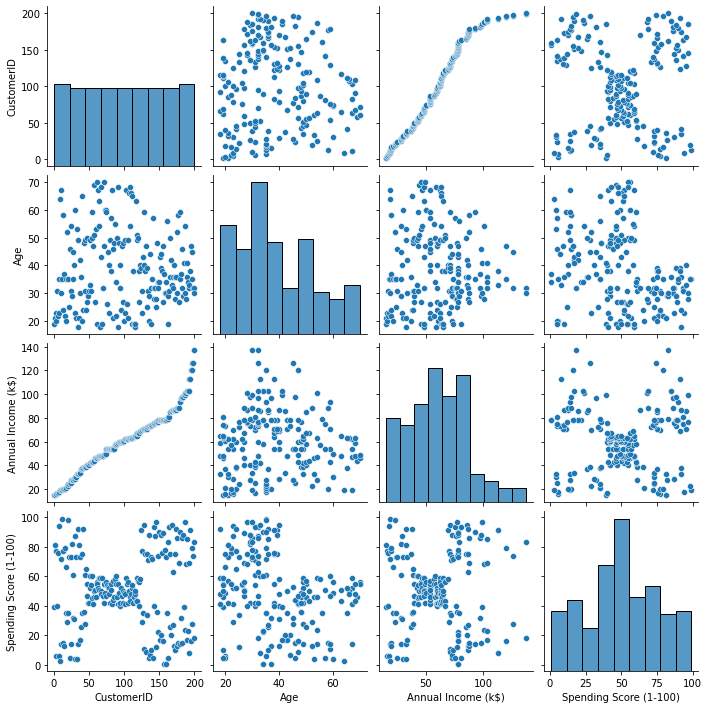

In [7]:
sns.pairplot(mall_df)

### Encodage de Gender

In [4]:
mall_df_enc = mall_df.copy()

In [5]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = enc.fit(mall_df_enc[['Gender']])
enc_df = pd.DataFrame(enc.transform(mall_df_enc[['Gender']]).toarray())
enc_df.columns = ['Female', 'Male']

In [6]:
mall_df_enc = mall_df_enc.merge(enc_df, on=mall_df_enc.index)
mall_df_enc = mall_df_enc.drop(['Gender', 'key_0'], axis=1)

In [7]:
mall_df_enc

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120,79,1.0,0.0
196,197,45,126,28,1.0,0.0
197,198,32,126,74,0.0,1.0
198,199,32,137,18,0.0,1.0


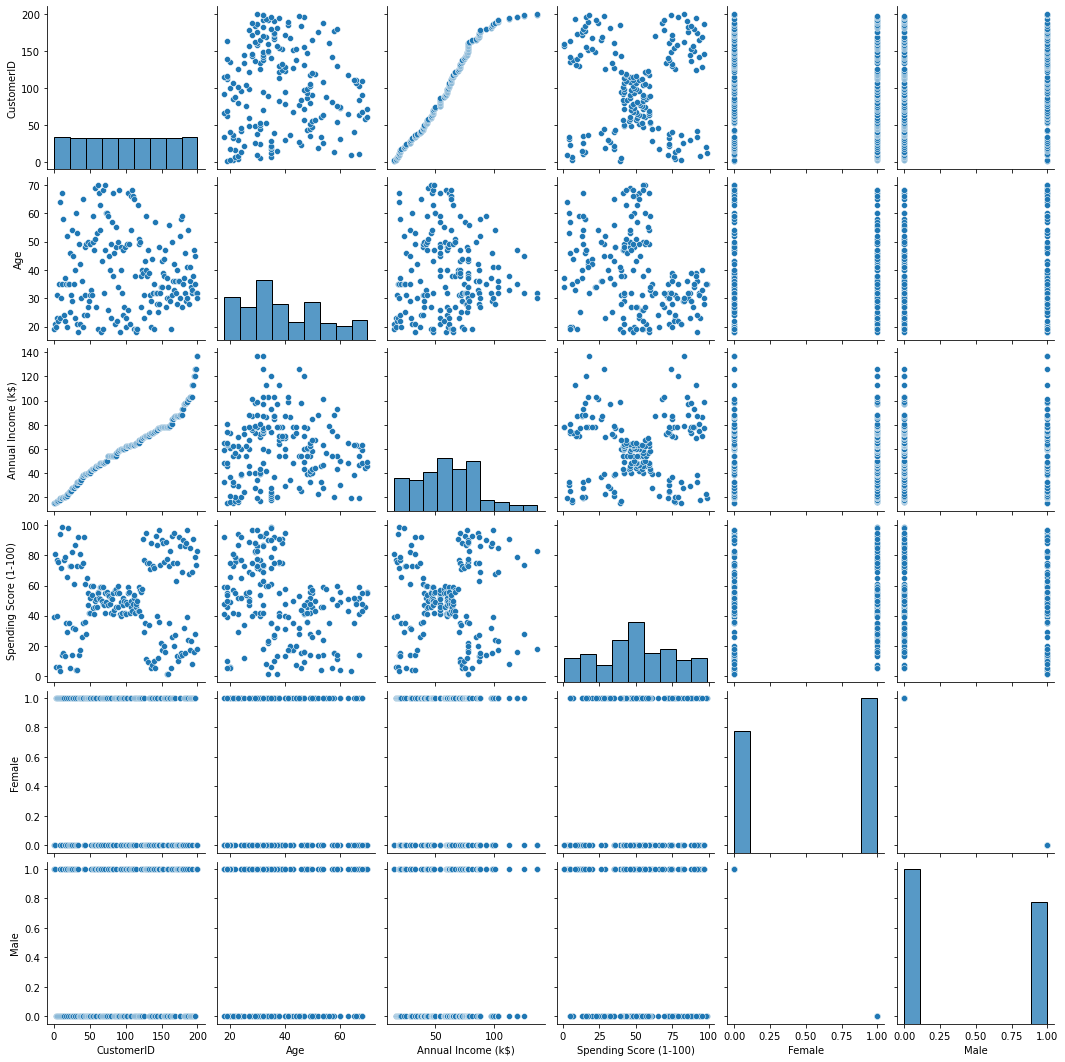

In [8]:
sns.pairplot(mall_df_enc)

In [8]:
Y = mall_df['CustomerID']
Xnum = mall_df.drop(['CustomerID'], axis=1)

### Scaling

In [126]:
mall_df_sc = mall_df_enc.copy()

In [127]:
mms = MinMaxScaler()
ft_mms = mms.fit(mall_df_sc[['Annual Income (k$)','Age']])
mall_df_sc_ai_age = ft_mms.transform(mall_df_sc[['Annual Income (k$)','Age']])
mall_df_sc_ai_age = pd.DataFrame(mall_df_sc_ai_age, columns=mall_df_sc[['Annual Income (k$)','Age']].columns)
mall_df_sc_ai_age

,Annual Income (k$),Age
0,0.000000,0.019231
1,0.000000,0.057692
2,0.008197,0.038462
3,0.008197,0.096154
4,0.016393,0.250000
...,...,...
195,0.860656,0.326923
196,0.909836,0.519231
197,0.909836,0.269231
198,1.000000,0.269231


In [128]:
sc = StandardScaler()
ft_sc = sc.fit(mall_df_sc[['Spending Score (1-100)']])
mall_df_sc_ss = ft_sc.transform(mall_df_sc[['Spending Score (1-100)']])
mall_df_sc_ss = pd.DataFrame(mall_df_sc_ss, columns=mall_df_sc[['Spending Score (1-100)']].columns)
mall_df_sc_ss

,Spending Score (1-100)
0,-0.434801
1,1.195704
2,-1.715913
3,1.040418
4,-0.395980
...,...
195,1.118061
196,-0.861839
197,0.923953
198,-1.250054


In [129]:
mall_df_sc = mall_df_sc.merge(mall_df_sc_ai_age, on=mall_df_sc.index)
mall_df_sc = mall_df_sc.drop(['key_0'], axis=1)
mall_df_sc = mall_df_sc.merge(mall_df_sc_ss, on=mall_df_sc.index)
mall_df_sc = mall_df_sc.drop(['key_0', 'Age_x', 'Annual Income (k$)_x', 'Spending Score (1-100)_x'], axis=1)
mall_df_sc.columns = ['CustomerID', 'Female','Male', 'Annual Income (k$)', 'Age','Spending Score (1-100)']

In [130]:
mall_df_sc

,CustomerID,Female,Male,Annual Income (k$),Age,Spending Score (1-100)
0,1,0.0,1.0,0.000000,0.019231,-0.434801
1,2,0.0,1.0,0.000000,0.057692,1.195704
2,3,1.0,0.0,0.008197,0.038462,-1.715913
3,4,1.0,0.0,0.008197,0.096154,1.040418
4,5,1.0,0.0,0.016393,0.250000,-0.395980
...,...,...,...,...,...,...
195,196,1.0,0.0,0.860656,0.326923,1.118061
196,197,1.0,0.0,0.909836,0.519231,-0.861839
197,198,0.0,1.0,0.909836,0.269231,0.923953
198,199,0.0,1.0,1.000000,0.269231,-1.250054


In [161]:
mall_df_mm = mall_df_enc.copy()

In [162]:
mms2 = MinMaxScaler()
ft_mms2 = mms2.fit(mall_df_mm[['Annual Income (k$)','Age','Spending Score (1-100)']])
mall_df_sc_ai_age_ss = ft_mms2.transform(mall_df_mm[['Annual Income (k$)','Age','Spending Score (1-100)']])
mall_df_sc_ai_age_ss = pd.DataFrame(mall_df_sc_ai_age_ss, columns=mall_df_mm[['Annual Income (k$)','Age','Spending Score (1-100)']].columns)

In [163]:
mall_df_mm = mall_df_mm.merge(mall_df_sc_ai_age_ss, on=mall_df_mm.index)
mall_df_mm = mall_df_mm.drop(['key_0', 'Age_x', 'Annual Income (k$)_x', 'Spending Score (1-100)_x'], axis=1)
mall_df_mm.columns = ['CustomerID', 'Female','Male', 'Annual Income (k$)', 'Age','Spending Score (1-100)']

In [164]:
mall_df_mm

,CustomerID,Female,Male,Annual Income (k$),Age,Spending Score (1-100)
0,1,0.0,1.0,0.000000,0.019231,0.387755
1,2,0.0,1.0,0.000000,0.057692,0.816327
2,3,1.0,0.0,0.008197,0.038462,0.051020
3,4,1.0,0.0,0.008197,0.096154,0.775510
4,5,1.0,0.0,0.016393,0.250000,0.397959
...,...,...,...,...,...,...
195,196,1.0,0.0,0.860656,0.326923,0.795918
196,197,1.0,0.0,0.909836,0.519231,0.275510
197,198,0.0,1.0,0.909836,0.269231,0.744898
198,199,0.0,1.0,1.000000,0.269231,0.173469


In [131]:
X = mall_df_sc.drop('CustomerID', axis=1)

In [182]:
Xnum = mall_df_sc.drop(['CustomerID','Male','Female'], axis=1)

In [132]:
corr_mall_df_sc = X.corr()


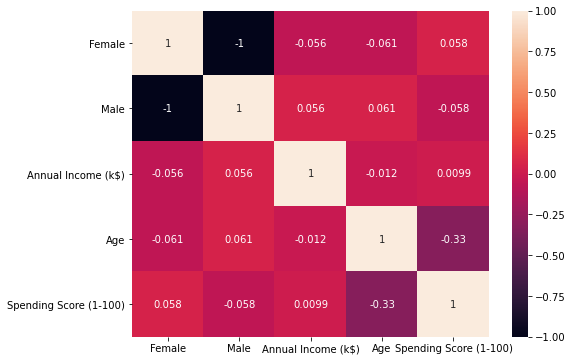

In [133]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mall_df_sc, annot=True)
plt.show()

### K-means

In [168]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


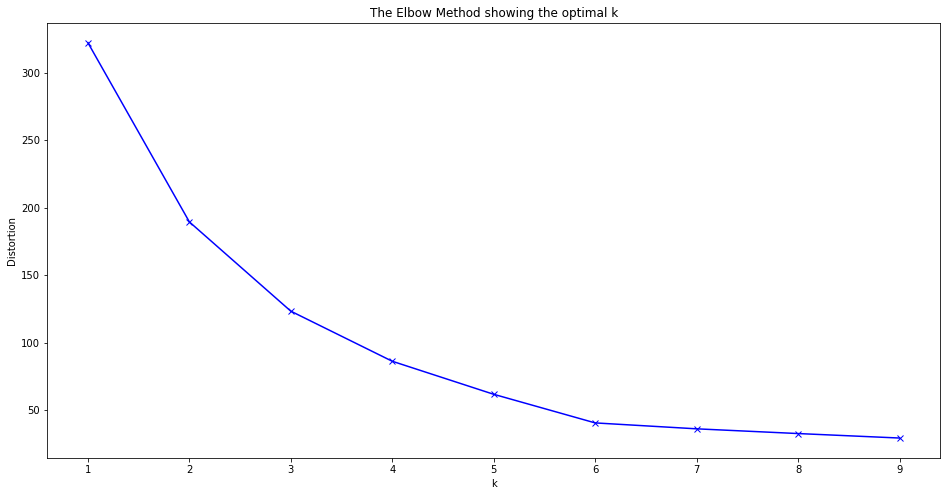

In [175]:
plt.subplots(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [136]:
kmeanModel2 = KMeans(n_clusters=2)
kmeanModel2.fit(X)

KMeans(n_clusters=2)

In [137]:
kmeanModel3 = KMeans(n_clusters=3)
kmeanModel3.fit(X)

KMeans(n_clusters=3)

In [138]:
kmeanModel4 = KMeans(n_clusters=4)
kmeanModel4.fit(X)

KMeans(n_clusters=4)

In [139]:
kmeanModel5 = KMeans(n_clusters=5)
kmeanModel5.fit(X)

KMeans(n_clusters=5)

In [140]:
kmeanModel6 = KMeans(n_clusters=6)
kmeanModel6.fit(X)

KMeans(n_clusters=6)

In [141]:
print(silhouette_score(X, kmeanModel2.labels_, metric='euclidean'))
print(silhouette_score(X, kmeanModel3.labels_, metric='euclidean'))
print(silhouette_score(X, kmeanModel4.labels_, metric='euclidean'))
print(silhouette_score(X, kmeanModel5.labels_, metric='euclidean'))
print(silhouette_score(X, kmeanModel6.labels_, metric='euclidean'))

0.33384286961723886
0.4211178367936714
0.43966812757842005
0.4823384127596886
0.504499679295457


In [142]:
mall_df_sc['kmeans'] = kmeanModel3.predict(X)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


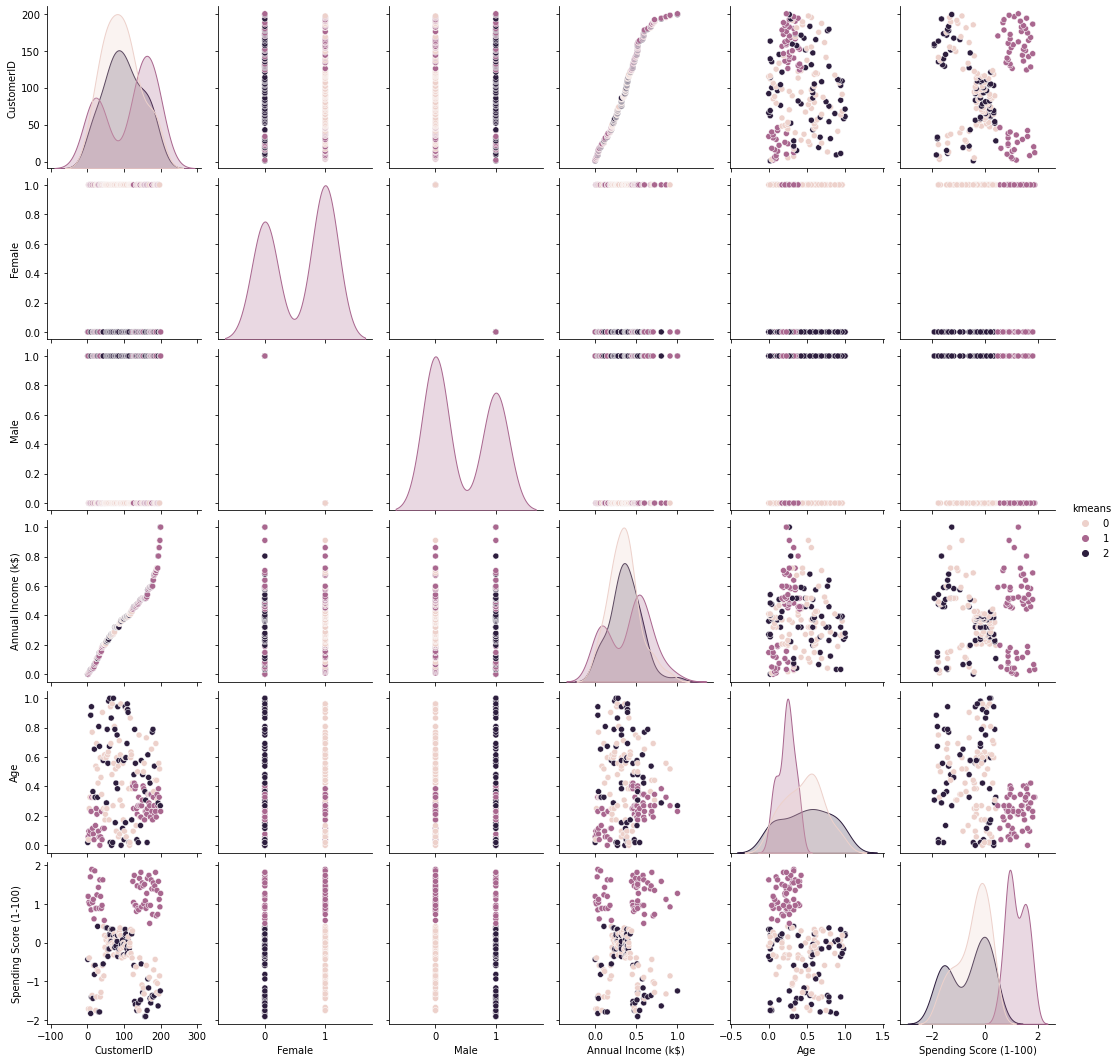

In [143]:
sns.pairplot(mall_df_sc, hue='kmeans')

### Gaussian Mixture

In [183]:
gmm = GaussianMixture(n_components=3)
gmm.fit(Xnum)

GaussianMixture(n_components=3)

In [184]:
mall_df_sc['GaussianMixture'] = gmm.predict(Xnum)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

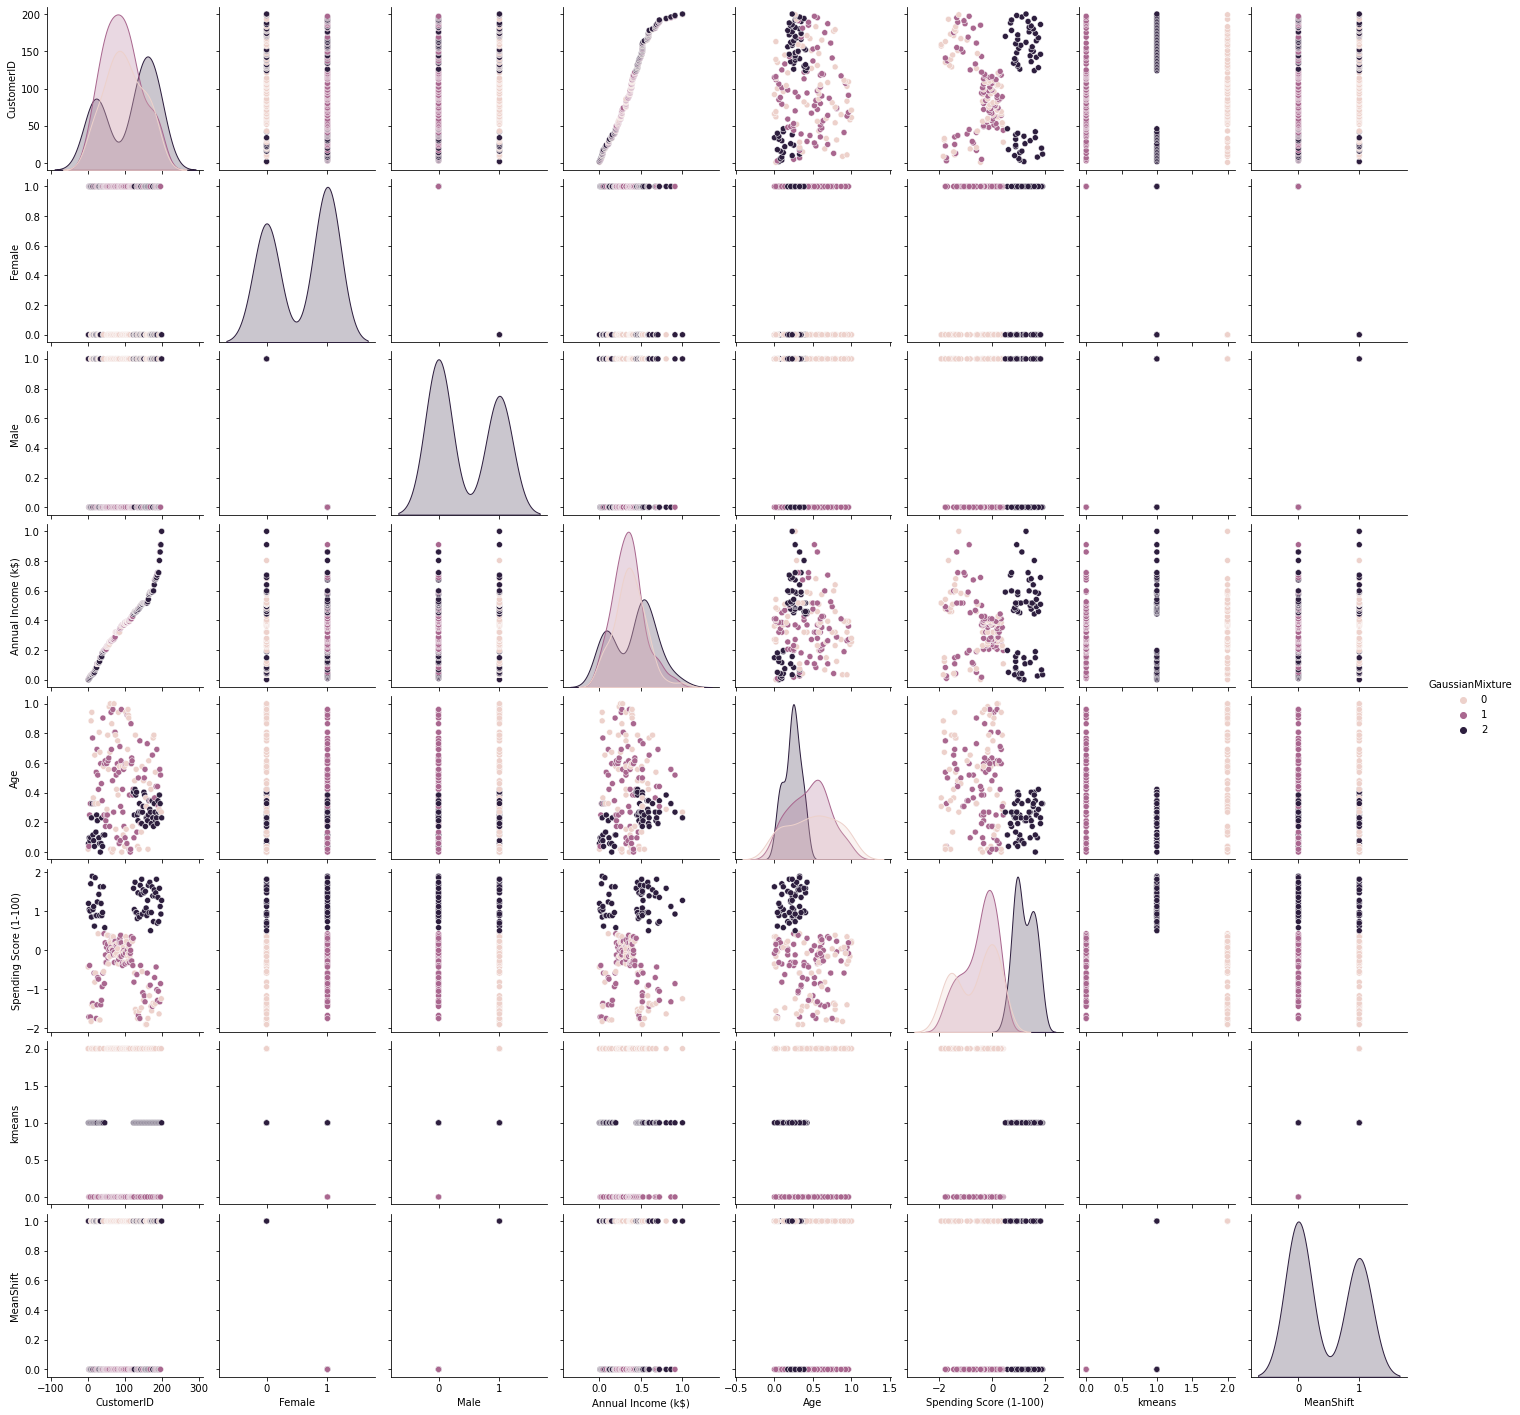

In [185]:
sns.pairplot(mall_df_sc, hue='GaussianMixture')

### MeanShift

In [186]:
ms = MeanShift().fit(Xnum)

In [187]:
mall_df_sc['MeanShift'] = ms.predict(Xnum)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

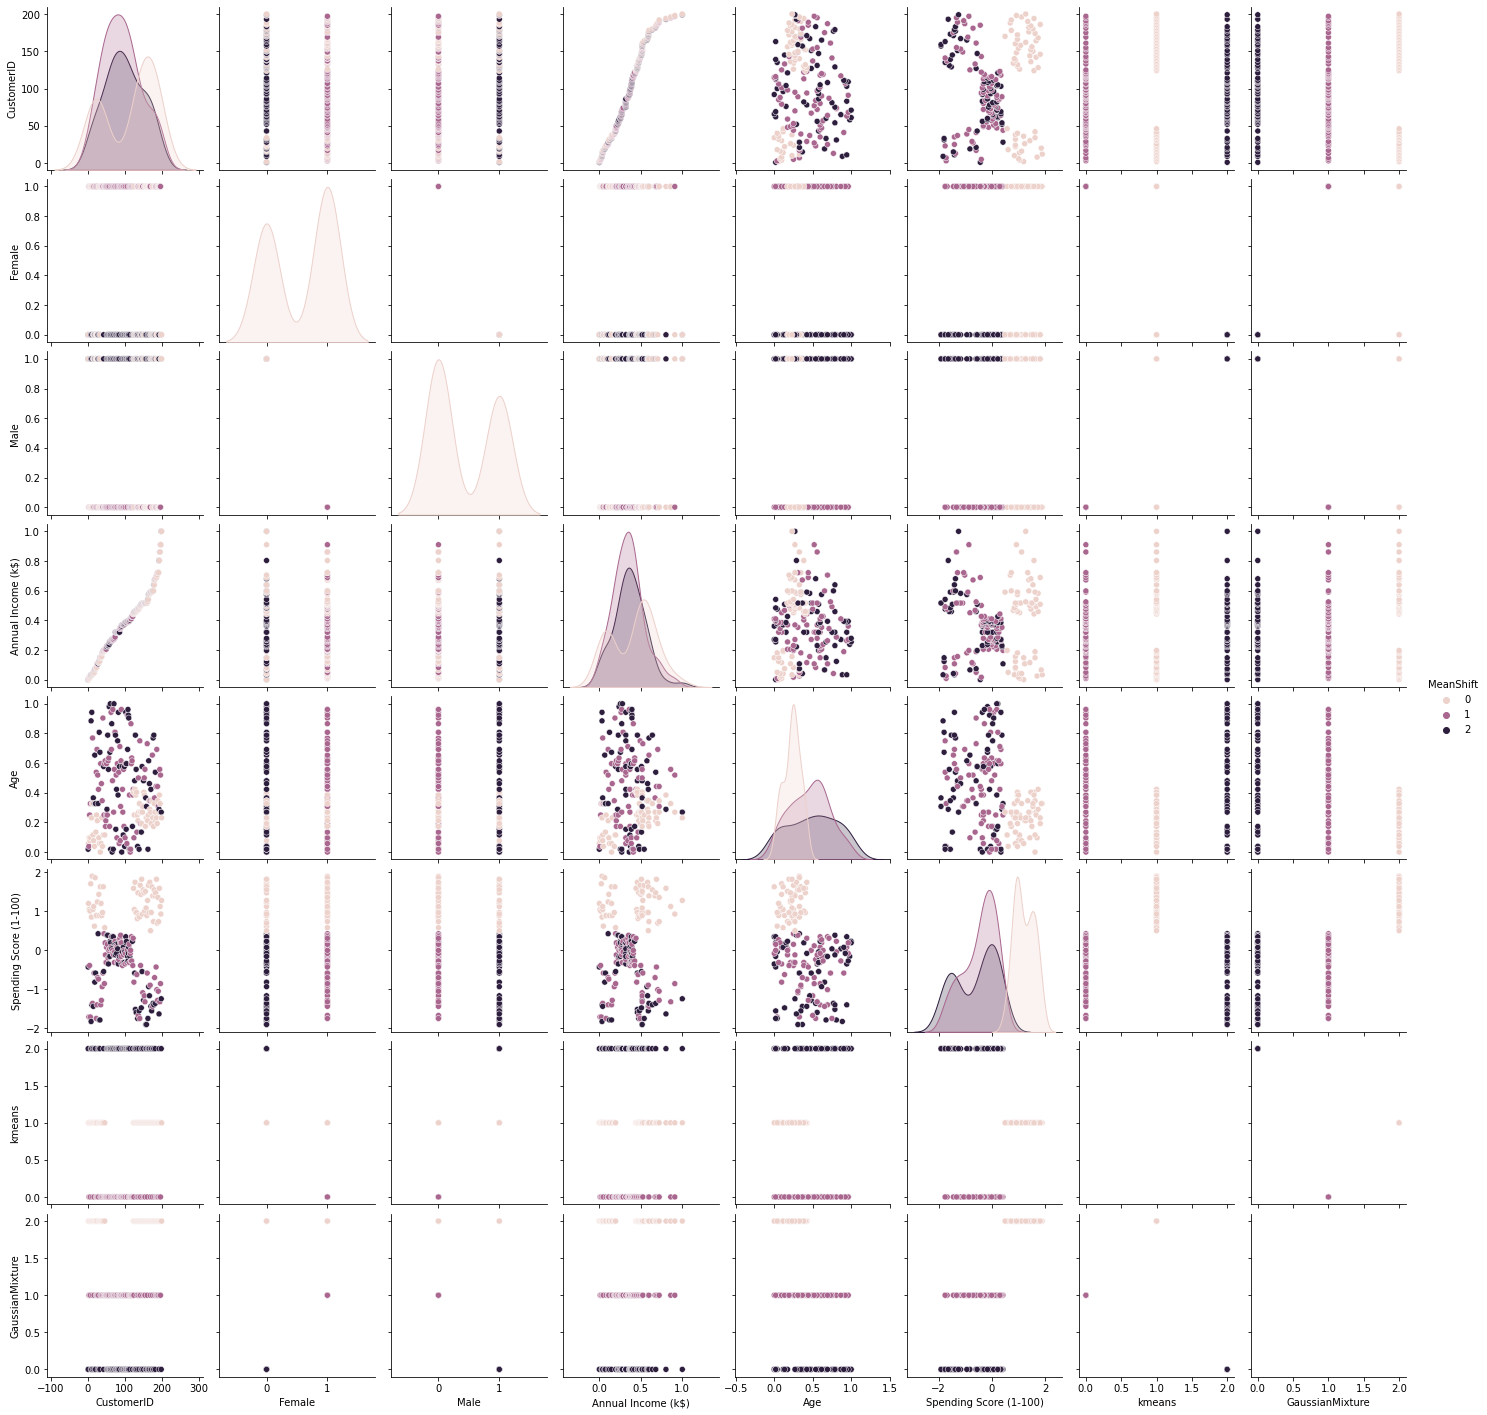

In [188]:
sns.pairplot(mall_df_sc, hue='MeanShift')

# Conclusions